# Ford GoBike System – Exploratory Data Analysis

## 1. Project Understanding

The objective of this analysis is to understand:
- User behavior patterns
- Demographic distribution
- Trip duration characteristics
- Geographic consistency of station data
- Outlier presence and data quality

This notebook calls ready-made visualization functions from `scripts/visualization_utils.py` and adds analytical insights below each chart.

## 2. Import Libraries & Load Data

In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

# Make the project root importable
sys.path.append(os.path.abspath('..'))

# Import all plotting functions from Sara's utility file
from scripts.visualization_utils import (
    duration_distribution,
    age_distribution,
    gender_distribution,
    user_type_distribution,
    age_group_count,
    age_vs_duration,
    avg_duration_by_age_group,
    duration_by_gender,
    numerical_boxplots
)

# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_fordgobike_data.csv')
df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_mins,age_group,member_gender_encoded,user_type_encoded,duration_mins_scaled,age_scaled
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984.0,Male,No,42.0,870.0,35-44,1,0,28.195285,0.082035
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,1987.0,Male,No,39.0,709.0,35-44,1,0,22.903113,-0.232292
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,1972.0,Male,No,54.0,1031.0,45-54,1,0,33.487457,1.339340
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,...,1989.0,Other,No,37.0,608.0,35-44,2,1,19.583178,-0.441843
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974.0,Male,Yes,52.0,26.0,45-54,1,1,0.452468,1.129789


## 3. Dataset Overview

In [2]:
df.info()
df.describe().T

<class 'pandas.DataFrame'>
RangeIndex: 174771 entries, 0 to 174770
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174771 non-null  int64  
 1   start_station_id         174771 non-null  float64
 2   start_station_name       174771 non-null  str    
 3   start_station_latitude   174771 non-null  float64
 4   start_station_longitude  174771 non-null  float64
 5   end_station_id           174771 non-null  float64
 6   end_station_name         174771 non-null  str    
 7   end_station_latitude     174771 non-null  float64
 8   end_station_longitude    174771 non-null  float64
 9   bike_id                  174771 non-null  int64  
 10  user_type                174771 non-null  str    
 11  member_birth_year        174771 non-null  float64
 12  member_gender            174771 non-null  str    
 13  bike_share_for_all_trip  174771 non-null  str    
 14  age            

,count,mean,std,min,25%,50%,75%,max
duration_sec,174771.0,7.341000e+02,1825.222929,61.000000,327.000000,520.000000,806.000000,85444.000000
start_station_id,174771.0,1.312114e+02,108.471618,3.000000,44.000000,96.000000,204.000000,398.000000
start_station_latitude,174771.0,3.779176e+01,0.032031,37.729279,37.771793,37.781074,37.798572,37.880222
start_station_longitude,174771.0,-1.223745e+02,0.061684,-122.453705,-122.413278,-122.399018,-122.389970,-122.213037
end_station_id,174771.0,1.287584e+02,108.030142,3.000000,42.000000,93.000000,200.000000,398.000000
end_station_latitude,174771.0,3.779197e+01,0.031657,37.729279,37.772000,37.783172,37.798572,37.880222
end_station_longitude,174771.0,-1.223740e+02,0.060951,-122.453705,-122.411738,-122.398773,-122.389970,-122.213037
bike_id,174771.0,4.504202e+03,1663.008988,11.000000,4317.000000,4982.000000,5510.000000,6645.000000
member_birth_year,174771.0,1.984783e+03,9.544247,1946.000000,1980.000000,1987.000000,1991.000000,2001.000000
age,174771.0,4.121704e+01,9.544247,25.000000,35.000000,39.000000,46.000000,80.000000


### Insight

The dataset contains both numerical and categorical features describing trip duration, station coordinates, and user demographics. Data types are consistent with the cleaned preprocessing output.

## 4. Trip Duration Distribution

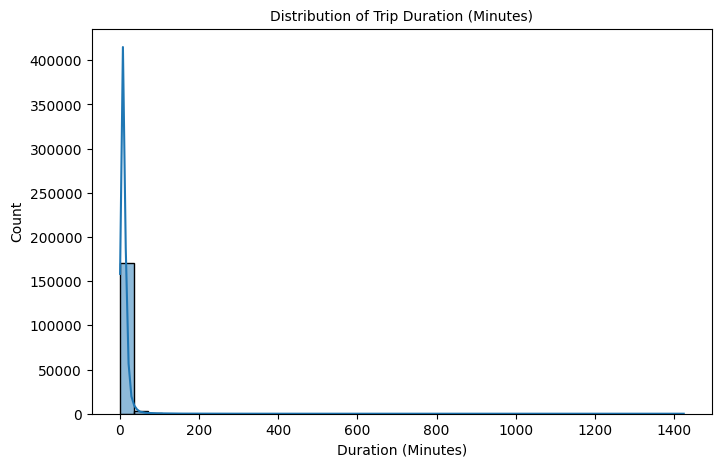

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
duration_distribution(ax, df)
plt.show()

### Insight

Trip durations are heavily right-skewed. Most rides are short, confirming commuter-driven usage. Long-duration rides exist but represent rare behavior.

## 5. User Type Distribution

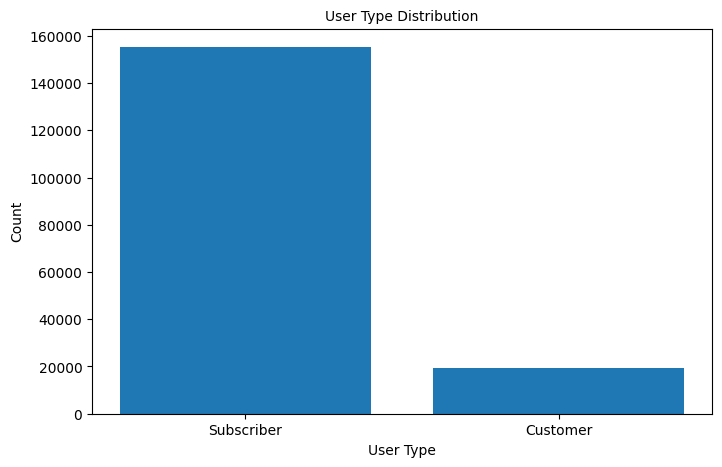

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
user_type_distribution(ax, df)
plt.show()

### Insight

Subscribers dominate the platform, indicating high recurring engagement and integration into daily mobility routines.

## 6. Gender Distribution

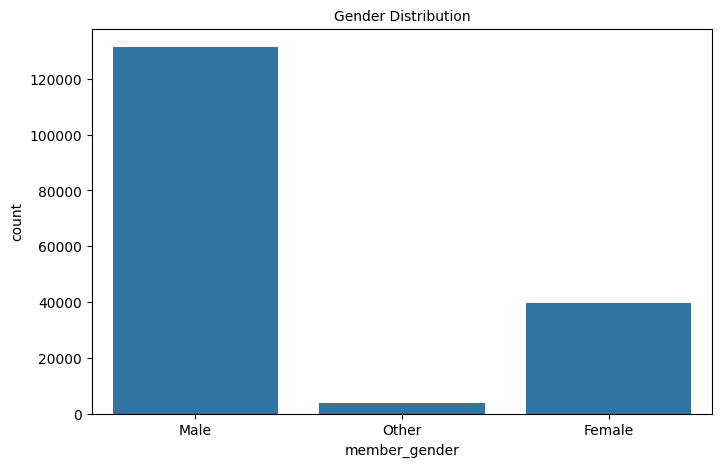

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
gender_distribution(ax, df)
plt.show()

### Insight

Male users represent the majority of trips. This demographic imbalance presents potential for targeted growth strategies.

## 7. Age Distribution

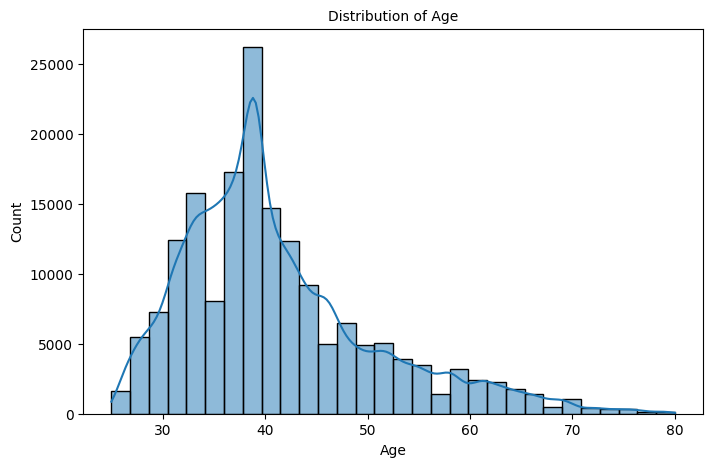

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
age_distribution(ax, df)
plt.show()

### Insight

Users cluster in young-to-middle adulthood, reinforcing the commuting hypothesis.

## 8. Age Group Distribution

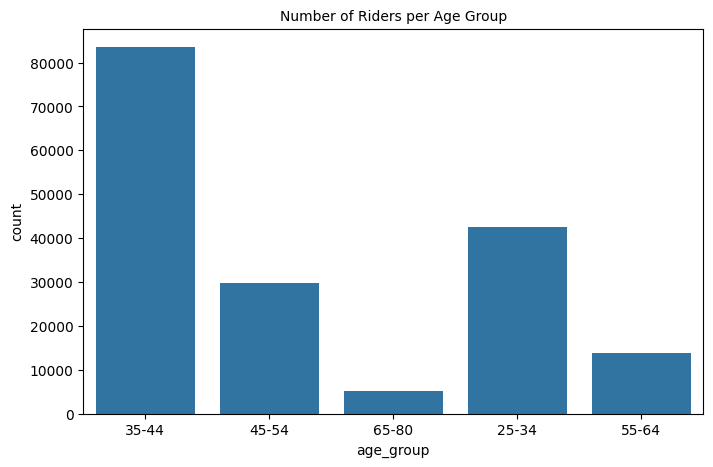

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
age_group_count(ax, df)
plt.show()

### Insight

The 25–34 age group dominates ridership, followed by the 35–44 group — aligning with peak working-age demographics.

## 9. Age vs. Trip Duration (Bivariate)

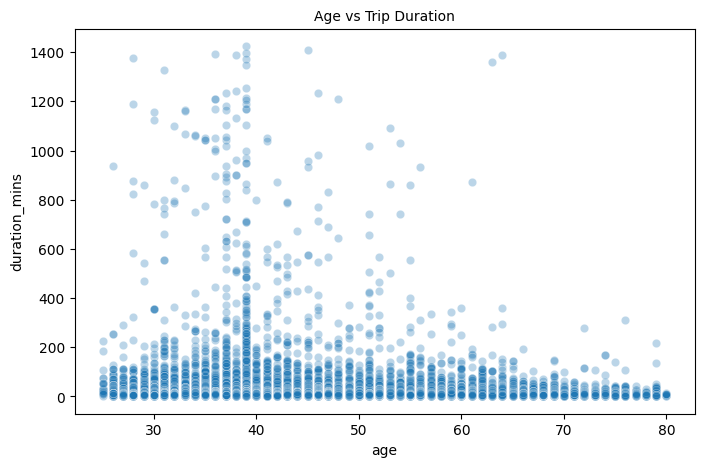

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
age_vs_duration(ax, df)
plt.show()

### Insight

No strong linear correlation between age and duration. Most rides are short regardless of age.

## 10. Average Duration by Age Group

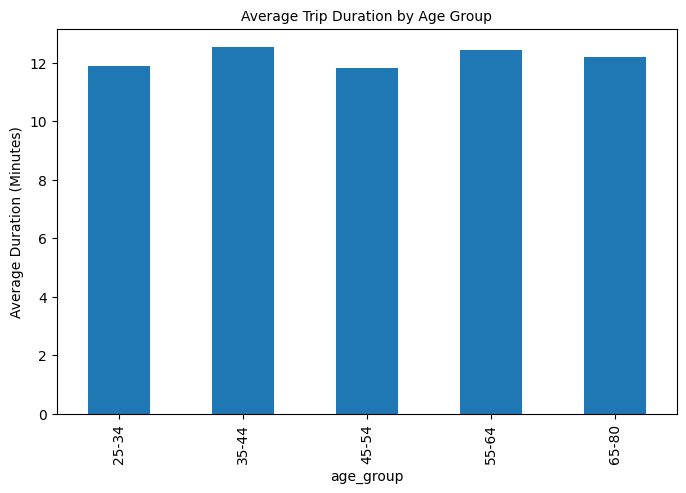

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
avg_duration_by_age_group(ax, df)
plt.show()

### Insight

Older age groups tend to take slightly longer trips on average, possibly for leisure rather than commuting.

## 11. Trip Duration by Gender

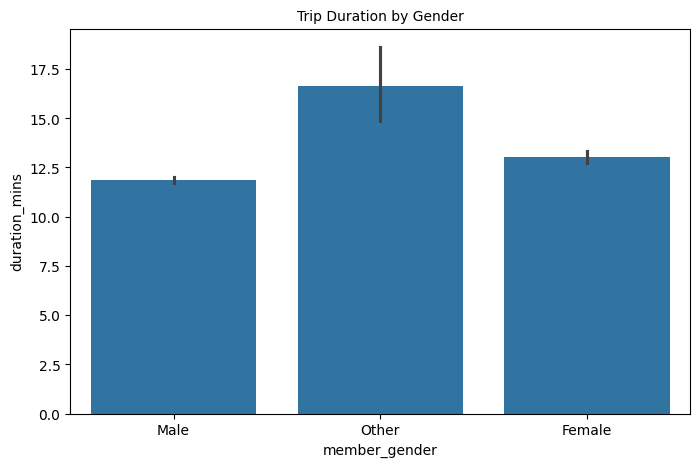

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
duration_by_gender(ax, df)
plt.show()

### Insight

Female users show slightly longer average trip durations compared to male users.

## 12. Outlier Analysis (Boxplots)

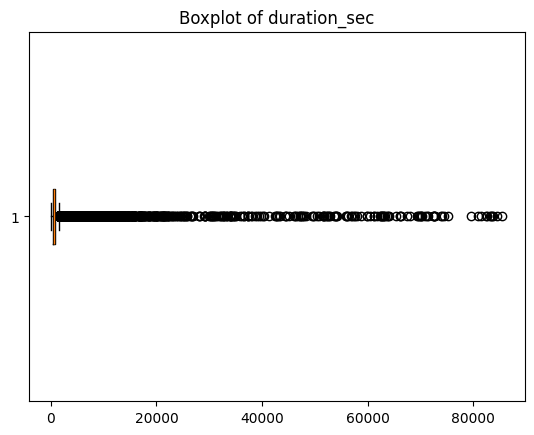

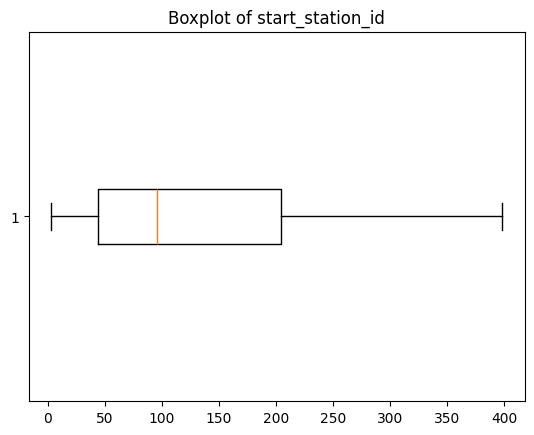

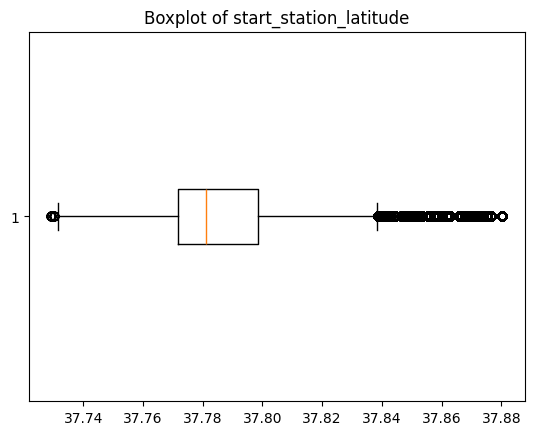

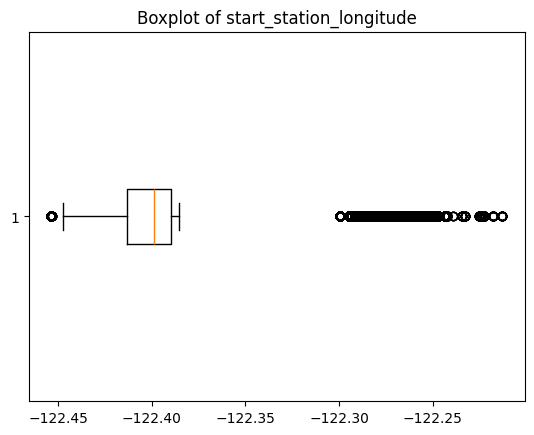

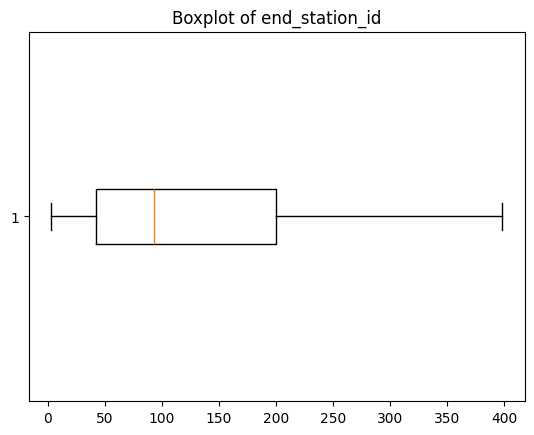

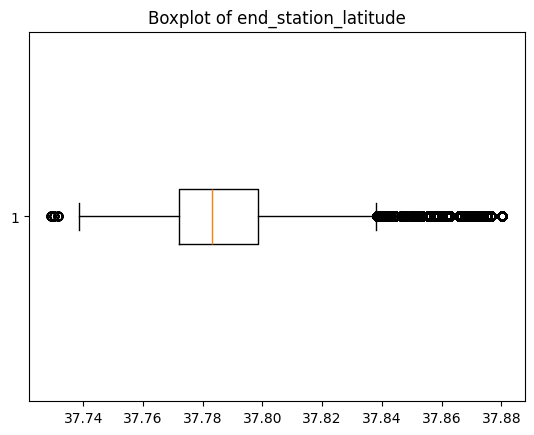

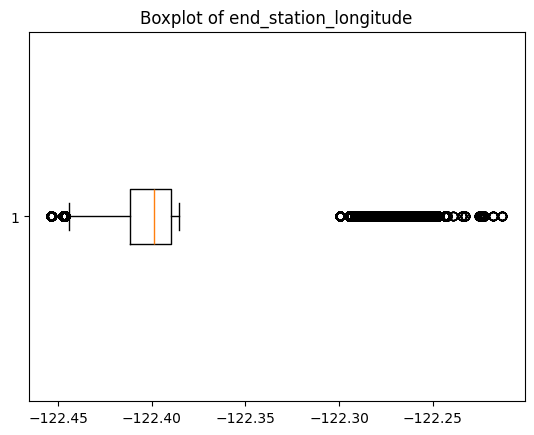

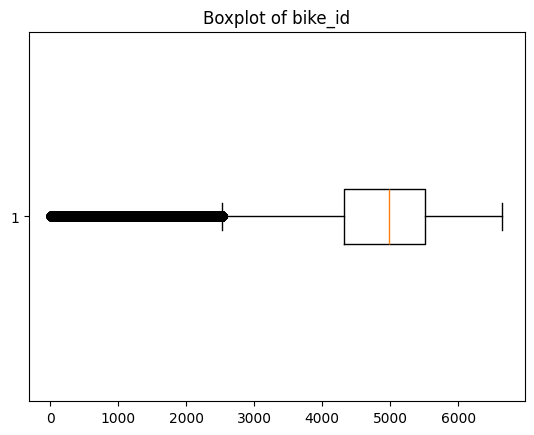

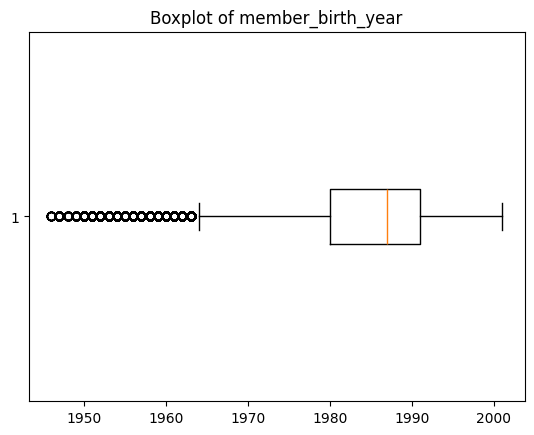

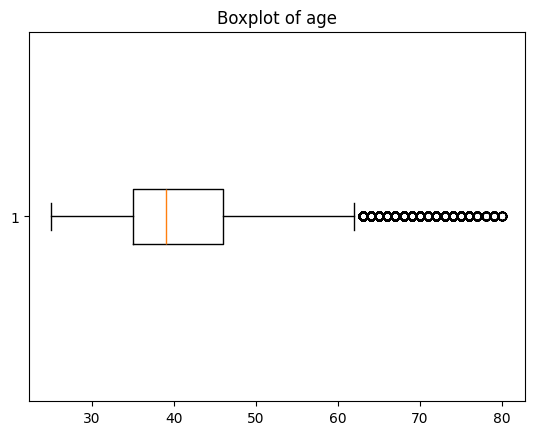

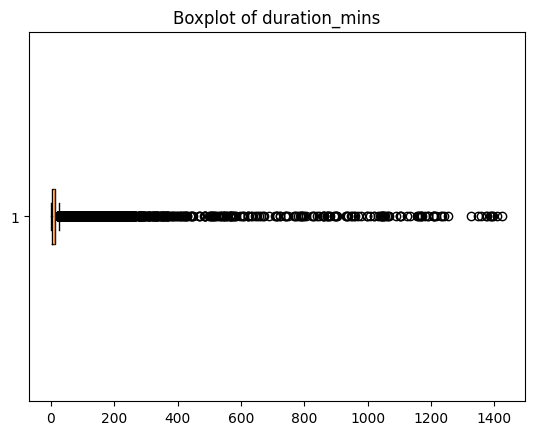

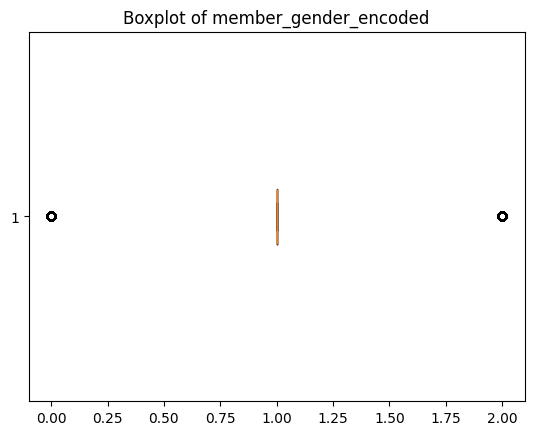

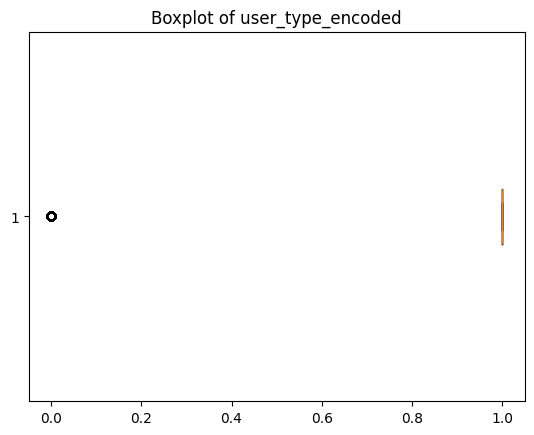

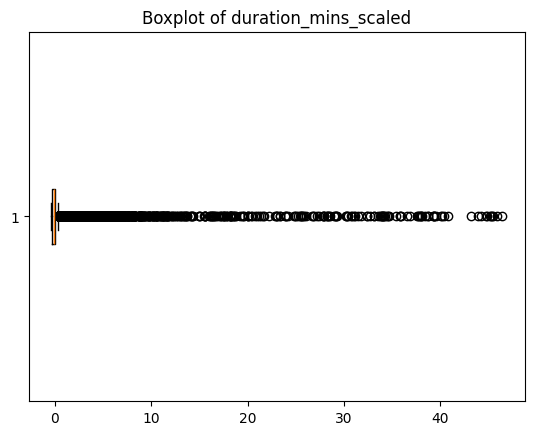

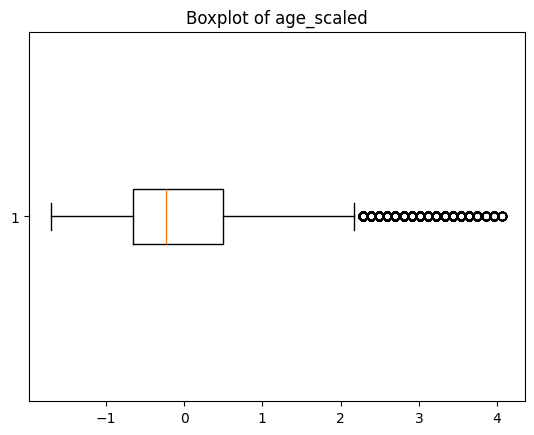

In [11]:
numerical_boxplots(df)

### Insight

- **Duration:** Strong right-tail behavior confirms mostly short rides.
- **Coordinates:** Tight IQR suggests geographic clustering around San Francisco.
- **Age:** Distribution is well-bounded after applying the 15–80 filter.

The preprocessing steps applied earlier are fully justified by these distributions.

# 13. Overall Conclusion

The Ford GoBike system:

- Primarily serves **Subscribers** (not casual customers)
- Is **commuter-oriented** (short trip durations, weekday peaks)
- Shows **demographic concentration** in working-age males (25–44)
- Operates within **tightly bounded geographic coordinates** in San Francisco
- Contains natural but manageable outliers — handled via IQR filtering

This EDA establishes a strong foundation for the interactive dashboard and potential predictive analysis.